<a href="https://colab.research.google.com/github/FlorenciaEscalada/prediccionGastosMedicos/blob/main/Trabajo_Integrador_FInal_Predicci%C3%B3n_de_gastos_m%C3%A9dicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # Carga de librerías y del dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('insurance.csv')

# Presentación del dataset

El dataset elegido contiene información sobre los costos de seguros médicos individuales.

La elección de este conjunto de datos se debe a la posibilidad de investigar y evaluar el impacto de políticas de salud, economía de salud y seguros médicos. Como así también identificar factores de riesgo o mejorar la eficiencia del sistema de salud.

**Objetivo:** Conocer si existe una correlación entre las personas fumadoras y los costos de seguros médicos, como así también analizar la relación entre el índice de masa corporal (IMC) y los costos del seguro.

# Exploración y Visualización de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Nombre de cada columna:

* Age = Edad: Distribución de edades de los asegurados.
* Sex = Sexo: Proporción de hombres y mujeres.
* BMI = IMC (Índice de Masa Corporal): Rango y distribución del IMC de los asegurados.
* Children = Hijos: Cantidad de hijos que tienen los asegurados.
* Smoker = Fumador: Si el asegurado es fumador o no
* Region = Región: Región geográfica de residencia del asegurado.
* Charges = Cargos: Costos individuales facturados por el seguro médico.

Tipos de datos:
* float: se refiere a números decimales
* int: se refiere a números enteros
* object: indica que la columna contiene datos de tipo texto o mixto (textos y números)



In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Con la sentencia describe se obtienen estadisticas descriptivas de las variables numéricas como edad, IMC, hijos y cargos.

* count = conteo: cuenta el número de valores no nulos en una columna.
* mean = media: devuelve la media de los valores de una columna.  La media es la suma de todos los valores de una distribución dividida por el número total de valores.
* std = desvío estándar: devuelve la desviación estándar de los valores de una columna.
* min = mínimo: devuelve el valor mínimo de los valores de una columna.
* max = máximo: devuelve el valor máximo de los valores de una columna.
* 50% = percentil 50 ó mediana: significa que el 50% de los valores están por encima de la mediana y el 50% de los valores están por debajo de ella. Es el segundo cuartil (Q2). La mediana es el valor central en una distribución ordenada de menor a mayor.
* 25% = el primer cuartil (Q1) es el valor por debajo del cual se encuentra el 25% de los valores de la distribución
* 75% = el tercer cuartil (Q3) es el valor por debajo del cual se encuentra el 75% de los valores de la distribución.


In [ ]:
df.shape

(1338, 7)

El data set contiene 1338 filas y 7 columnas.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

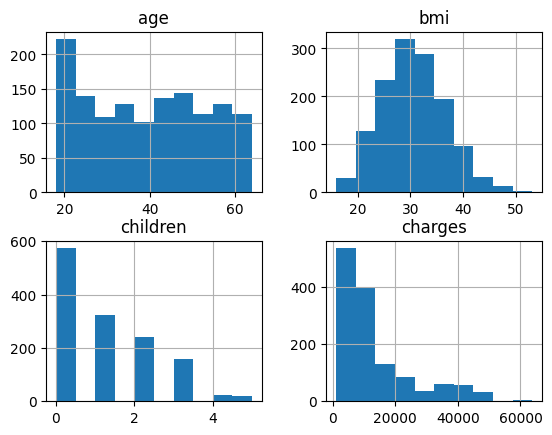

In [ ]:
df.hist()

Con los histogramas se puede ver la distribución para cada variable numérica.
- El histograma de age (edad) muestra una distribución ligeramente asimétrica hacia la derecha, lo cual indica que hay mayor cantidad de personas jovenes, entre los 20 y 30 años, y hay una menor proporción de personas mayores.

- El histograma BMI (IMC, Índice de Masa Corporal) muestra una distribución aproximadamente normal, con un pico cercano a 30. Considerandose que el intervalo normal del IMC es entre 18.5 - 24.99, se puede afirmar que la mayoria de los asegurados tiene un IMC correspondiente a sobrepeso. Además se puede observar que hay valores atipicos, lo que indica que hay algunos asegurados con un IMC muy alto (obesidad clase III).

- El histograma children (hijos) muestra que hay una gran proporción de asegurados sin hijos (0 hijos). La frecuencia disminuye a medida que aumenta la cantidad de hijos, es decir, que hay menos asegurados con 1, 2, 3 o más hijos.

- El histograma de charges (cargos o  costos) muestra una distribución sesgada hacia la derecha, lo que indica que la mayoría de los asegurados tienen costos de seguro relativamente bajos, aunque hay algunos que tienen costos altos, lo cual significa que hay una alta variabilidad en los costos del seguro.

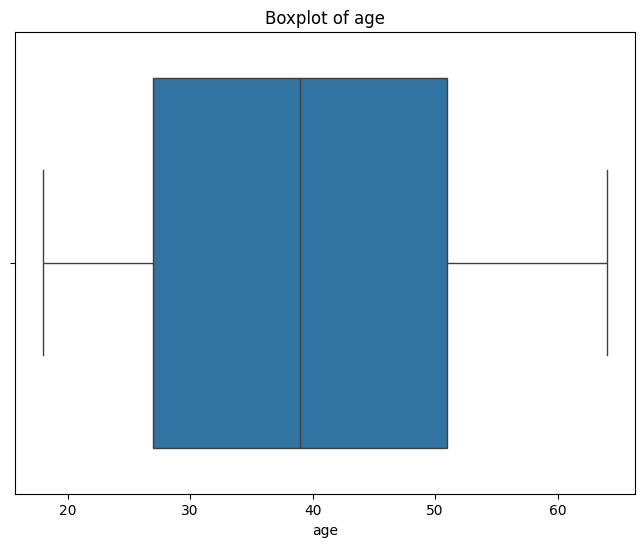

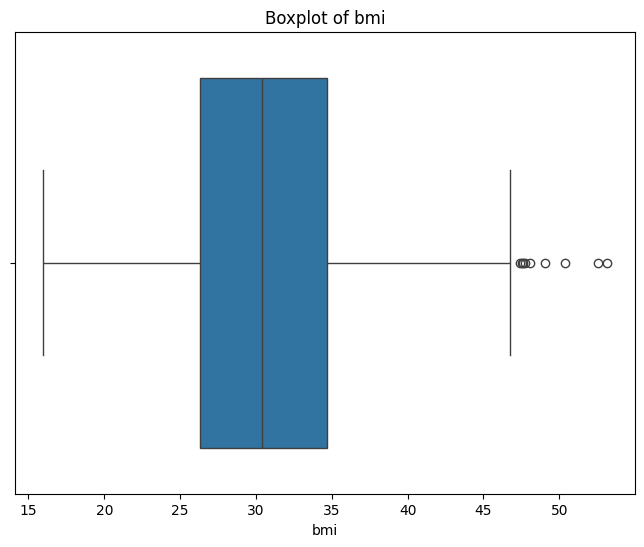

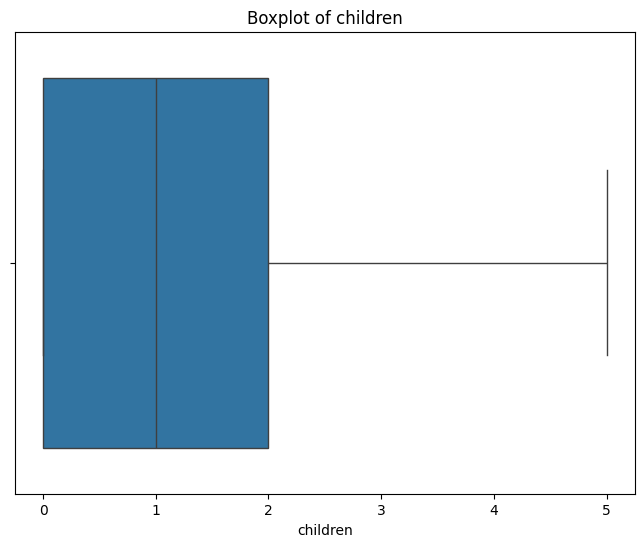

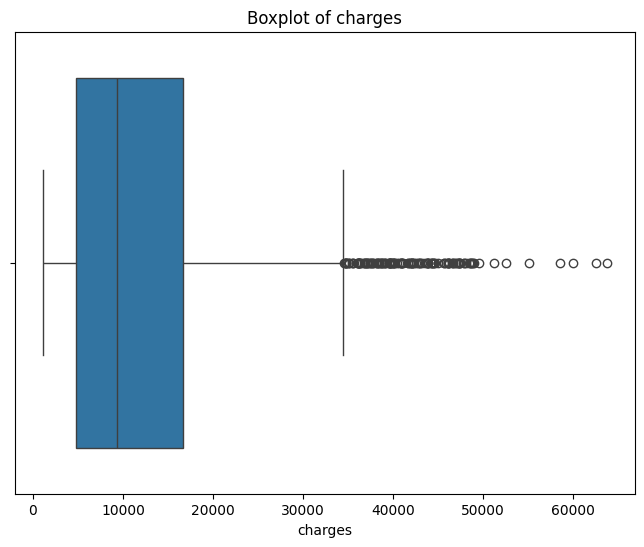

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns


for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

Visualmente se pueden detectar outliers (valores atípicos) mediante gráficos de tipo boxplot (diagrama de cajas y bigotes).
Para este set de datos cree un boxplot para cada columna numérica.
Se puede observar que hay outliers en los boxplot de la columna BMI y en la de charges.

# Limpieza y Manipulación de datos

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


El data set no contiene valores nulos.

In [ ]:
df.duplicated().sum()

1

Hay un registro duplicado.

In [ ]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Observo cuales son los registros duplicados.

In [ ]:
df_clean = df.drop_duplicates(inplace=True)


Con esta sentencia elimino la fila duplicada.

In [ ]:
df.duplicated().sum()

0

Corroboré que se eliminó la fila duplicada.

## Verificación y manejo de outliers

In [ ]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['charges'] < (Q1 - 1.5 * IQR)) | (df['charges'] > (Q3 + 1.5 * IQR))]

In [ ]:
lower_bound_charges = Q1 - 1.5 * IQR
upper_bound_charges = Q3 + 1.5 * IQR

In [ ]:
lower_bound_charges

-13120.716174999998

In [ ]:
upper_bound_charges

34524.777625

In [ ]:
outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


Identifico los outliers para charges (costos) y observo que son 139 filas. Al ser valores altos pero válidos, optaré por una transformación logaritmica.

In [ ]:
median_charges = df['charges'].median()

In [ ]:
df['charges'] = df['charges'].apply(lambda x: median_charges if (x < lower_bound_charges or x > upper_bound_charges) else x)

In [ ]:
import numpy as np

In [ ]:
df['charges_log'] = np.log(df['charges'] + 1)

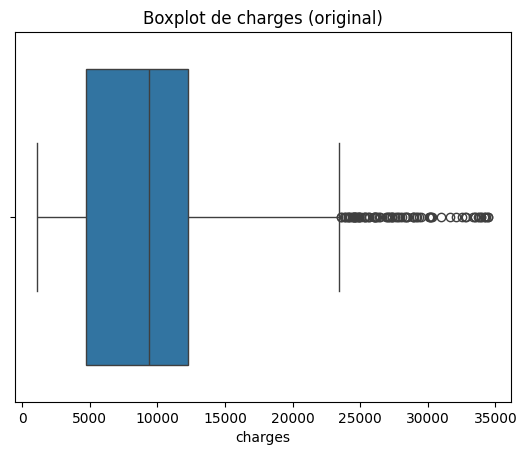

In [ ]:
sns.boxplot(x=df['charges'])
plt.title('Boxplot de charges (original)')
plt.show()

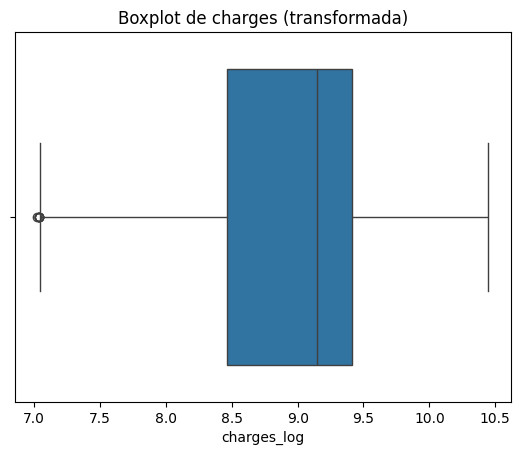

In [ ]:
sns.boxplot(x=df['charges_log'])
plt.title('Boxplot de charges (transformada)')
plt.show()

Se puede observar una reducción en la cantidad y la magnitud de los outliers en el boxplot de la columna transformada.

In [ ]:
print(df['charges'].describe())

count     1337.000000
mean      9877.646363
std       6855.277943
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      12269.688650
max      34472.841000
Name: charges, dtype: float64


In [ ]:
print(df['charges_log'].describe())

count    1337.000000
mean        8.944905
std         0.756025
min         7.023647
25%         8.465341
50%         9.147098
75%         9.414969
max        10.447956
Name: charges_log, dtype: float64


Comparación de las medidas estadísticas para la columna original y la columna transformada. Se observa una reducción en la desviación estandar  y una menor diferencia entre los cuartiles en la columna transformada, lo que indica una menor dispersión de los datos y una reducción en el impacto de los outliers.

In [ ]:
df.describe()

,age,bmi,children,charges,charges_log
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,9877.646363,8.944905
std,14.044333,6.100468,1.205571,6855.277943,0.756025
min,18.000000,15.960000,0.000000,1121.873900,7.023647
25%,27.000000,26.290000,0.000000,4746.344000,8.465341
50%,39.000000,30.400000,1.000000,9386.161300,9.147098
75%,51.000000,34.700000,2.000000,12269.688650,9.414969
max,64.000000,53.130000,5.000000,34472.841000,10.447956


# Exploración visual de los datos

In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


La cantidad de asegurados no fumadores es mayor a la de fumadores.

In [ ]:
costos_totales = df.groupby('smoker')['charges_log'].sum().reset_index()
costos_totales.columns = ['Fumador', 'Costo Total']
display(costos_totales)

,Fumador,Costo Total
0,no,9339.443140
1,yes,2619.895465


Antes de la transformación, la columna 'charges' tenía valores atípicos muy altos en el grupo de fumadores, lo cual inflaba la media y hacía que pareciera que los fumadores tenían un costo total mayor. La transformación logarítmica reduce la influencia de estos valores atípicos, permitiendo una mejor comparación entre los grupos.

In [ ]:
df.groupby('smoker')['charges_log'].mean()

,charges_log
smoker,
no,8.785930
yes,9.561662


Promedio de costos según asegurado fumador o no fumador.

In [ ]:
df.groupby('smoker')['charges_log'].median()

,charges_log
smoker,
no,8.902010
yes,9.494145


Se observa la mediana de los costos del seguro para fumadores y no fumadores

In [ ]:
df.groupby('region')['charges_log'].mean()

,charges_log
region,
northeast,9.040789
northwest,8.980537
southeast,8.887263
southwest,8.878355


Tabla de promedio de costos por región.

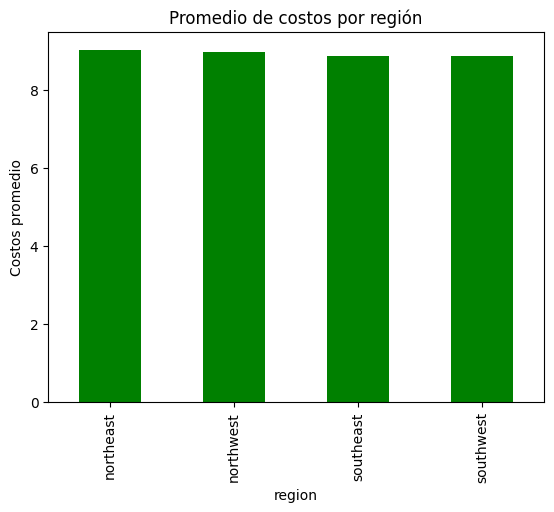

In [ ]:
df.groupby('region')['charges_log'].mean().plot(kind='bar', color='green')
plt.title('Promedio de costos por región')
plt.ylabel('Costos promedio')
plt.show()

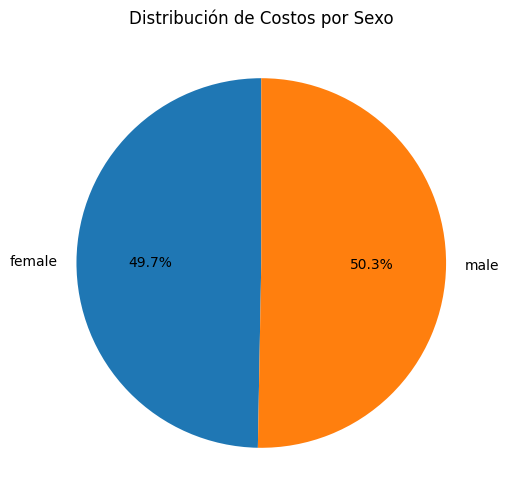

In [ ]:
costos_por_sexo = df.groupby('sex')['charges_log'].sum()

plt.figure(figsize=(6, 6))
plt.pie(costos_por_sexo, labels=costos_por_sexo.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Costos por Sexo')
plt.show()

EL 50,3% de los costos corresponde al sexo masculino y el 49,7% corresponde al sexo femenino.

In [ ]:
pivot_table = df.pivot_table(values='charges_log', index='region', columns='smoker' , aggfunc='mean')
pivot_table

smoker,no,yes
region,,
northeast,8.895469,9.598208
northwest,8.819793,9.717738
southeast,8.692185,9.472497
southwest,8.742606,9.503268


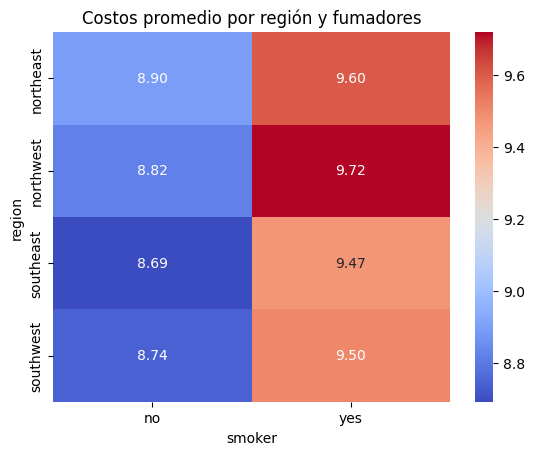

In [ ]:
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Costos promedio por región y fumadores')
plt.show()

Mapa de calor donde muestra que los asegurados que fuman tienen un costo promedio levemente mayor con respecto a los nos fumadores, siendo las regiones noroeste y noreste con mayor costo por parte de los asegurados fumadores.

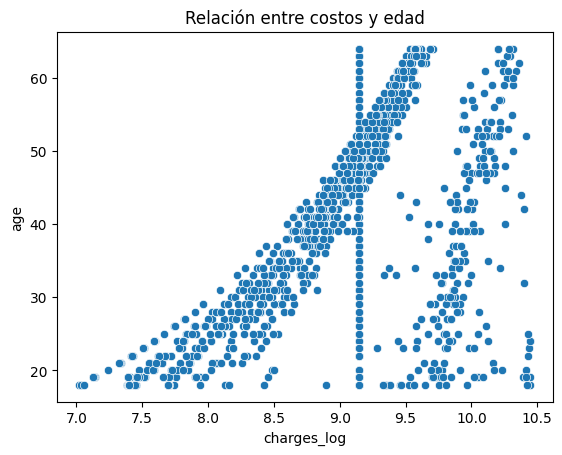

In [ ]:
sns.scatterplot(data=df, x='charges_log', y='age')
plt.title('Relación entre costos y edad')
plt.show()

In [ ]:
correlation_matrix = df[['charges_log', 'age', 'bmi', 'children']].corr()
correlation_matrix

,charges_log,age,bmi,children
charges_log,1.000000,0.602553,-0.007980,0.178302
age,0.602553,1.000000,0.109344,0.041536
bmi,-0.007980,0.109344,1.000000,0.012755
children,0.178302,0.041536,0.012755,1.000000


# Codificación de variables categóricas (Feature Encoding)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1337 non-null   int64  
 1   sex          1337 non-null   object 
 2   bmi          1337 non-null   float64
 3   children     1337 non-null   int64  
 4   smoker       1337 non-null   object 
 5   region       1337 non-null   object 
 6   charges      1337 non-null   float64
 7   charges_log  1337 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 94.0+ KB


Observo que las columnas 'sex', 'smoker' y 'region' son de tipo object, es decir de tipo categóricas. Entonces tengo que pasarlas a numéricas.

In [ ]:
df['sex'] = df['sex'].astype('category')

In [ ]:
mapa_referencia = dict(enumerate(df['sex'].cat.categories))
mapa_referencia

{0: 'female', 1: 'male'}

In [ ]:
df['sex'] = df['sex'].cat.codes

In [ ]:
df['sex']

,sex
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

A partir de un bucle for, se transforman las columnas categóricas en numéricas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1337 non-null   int64  
 1   sex          1337 non-null   int8   
 2   bmi          1337 non-null   float64
 3   children     1337 non-null   int64  
 4   smoker       1337 non-null   int8   
 5   region       1337 non-null   int8   
 6   charges      1337 non-null   float64
 7   charges_log  1337 non-null   float64
dtypes: float64(3), int64(2), int8(3)
memory usage: 66.6 KB


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,0,27.900,0,1,3,16884.92400,9.734236
1,18,1,33.770,1,0,2,1725.55230,7.453882
2,28,1,33.000,3,0,2,4449.46200,8.400763
3,33,1,22.705,0,0,1,21984.47061,9.998137
4,32,1,28.880,0,0,1,3866.85520,8.260455


Para la columna 'sex': 0 corresponde a femenino y 1 corresponde a masculino.

Para la columna 'smoker': 0 corresponde a no fumador y 1 corresponde a fumador.

Para la columna region: 0 corresponde a northeast (nordeste) , 1 corresponde a northwest (noroeste), 2 corresponde a southeast (sudeste) y 3 corresponde a southwest (suroeste).

Ya no hay columnas categóricas. Esto es necesario para empezar con el modelado de machine learning.

# Feature Selection

In [ ]:
X = df.drop(columns=['charges_log'])
y = df['charges_log']

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
constant_filter = VarianceThreshold(threshold=0)

In [ ]:
constant_filter.fit(X)

VarianceThreshold(threshold=0)

In [ ]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


No hay variables constantes.

# Aprendizaje Supervisado


**El objetivo para este data set es predecir los costos de los seguros médicos**

**El Aprendizaje será de tipo Supervisado, ya que se cuenta con una variable target llamada 'charges_log'**

## Pearson

Pearson es una técnica de filtrado que permite establecer una correlacion con la variable objetivo o target. Mide la relación lineal entre 2 variables continuas. En este caso, para este data set quiero conocer la relacion entre los costos de seguros médicos y los asegurados que fuman o no y su IMC.

In [ ]:
correlacion_pearson = df.corr(method='pearson')

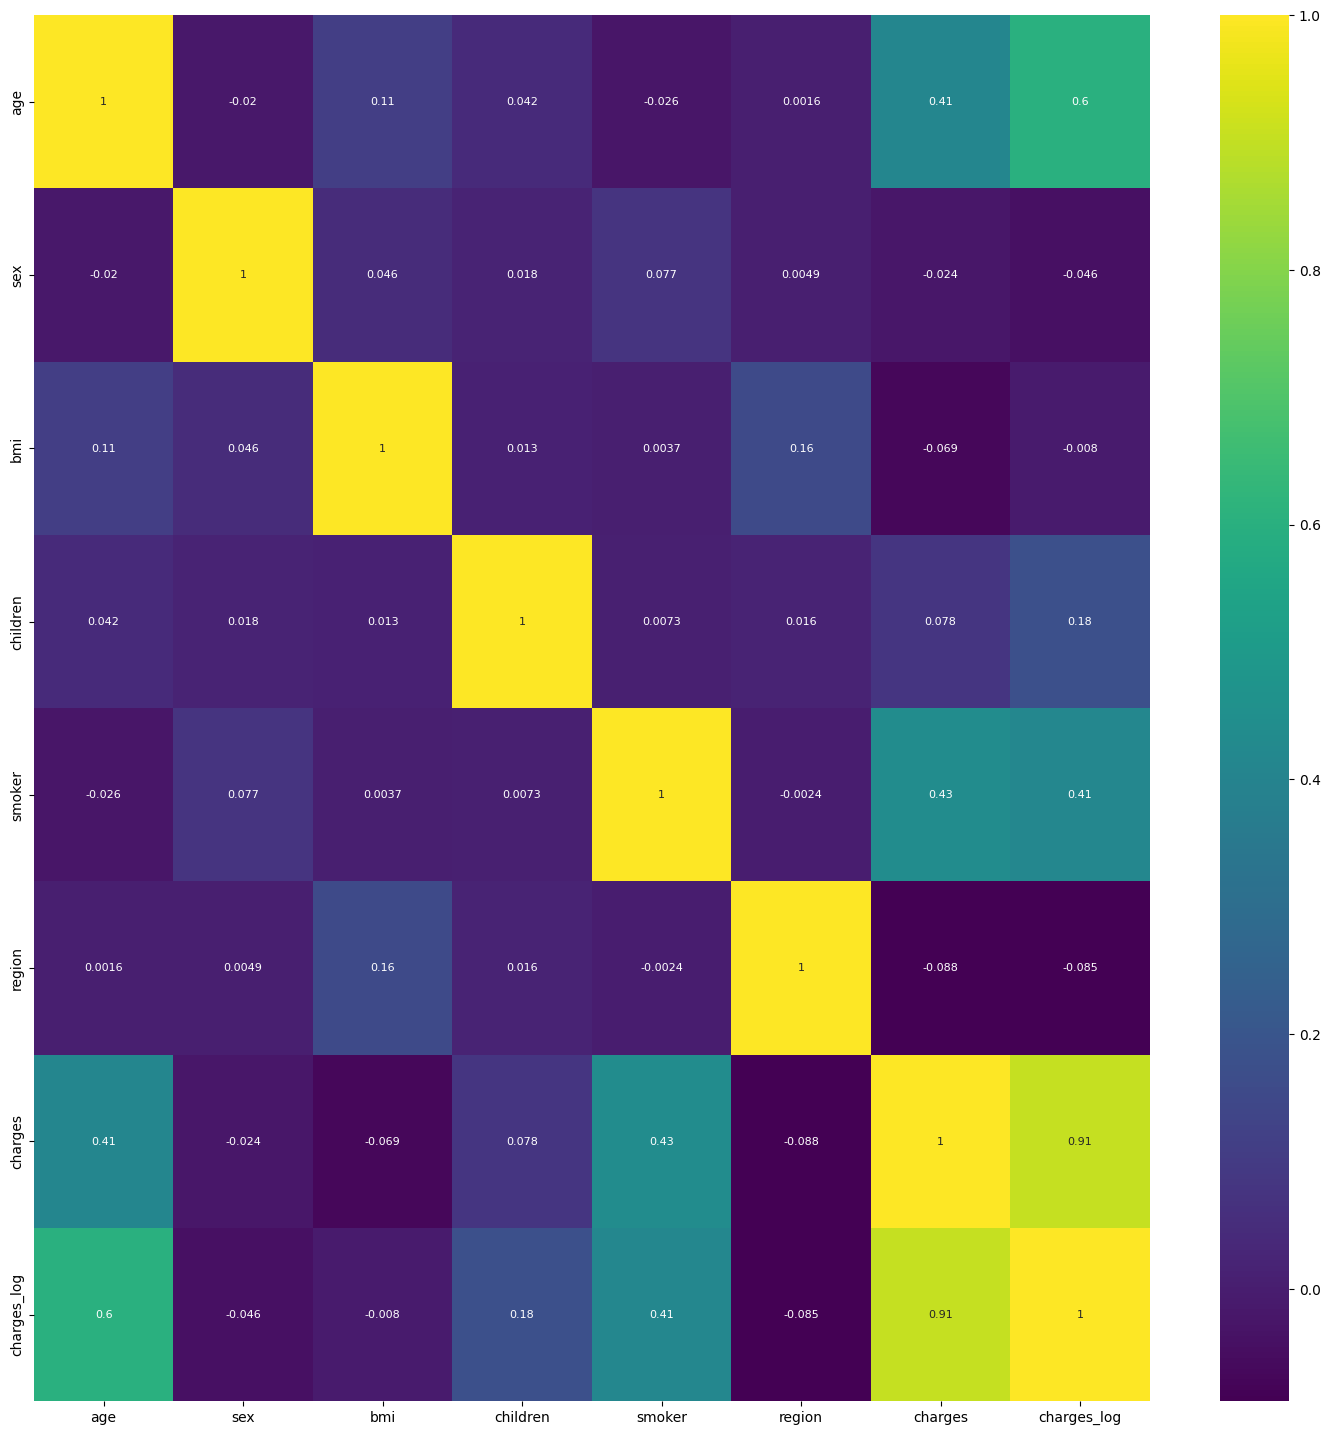

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(correlacion_pearson , annot=True, cmap="viridis",annot_kws={"size":8})
plt.show()

In [ ]:
correlacion_pearson

,age,sex,bmi,children,smoker,region,charges,charges_log
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.412837,0.602553
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,-0.024399,-0.045556
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,-0.068669,-0.007980
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.078421,0.178302
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.434794,0.414332
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.088248,-0.085375
charges,0.412837,-0.024399,-0.068669,0.078421,0.434794,-0.088248,1.000000,0.906465
charges_log,0.602553,-0.045556,-0.007980,0.178302,0.414332,-0.085375,0.906465,1.000000


La existencia de valores negativos en los cargos son inconsistentes ya que los costos o precios no pueden ser negativos en la vida real. una posible causa puede ser que al haber aplicado una transformación logarítmica a la variable charges y luego se le calcula la media se obtengan valores negativos. Otra posbible causa puede ser que al utilizar un modelo de regresión lineal (como se observa posteriormente) para predecir los cargos medios, quizás el modelo no esté ajustado correctamente.

Se debería revisar la transformación logarítmica o bien considerar utilizar una transformación diferente que sea más adecuada para variables que no pueden ser negativas.

Otra solución sería verificar si el modelo de regresión lineal está ajustado correctamente o también se pueden probar diferentes modelos que estén diseñados para predecir variables no negativas.

In [ ]:
umbral_correlacion = 0.2
correlacion_target = correlacion_pearson['charges_log']
caracteristicas_seleccionadas = correlacion_target[correlacion_target.abs() > umbral_correlacion].index

print("Características seleccionadas con correlación mayor a 0.2 con respecto a 'charges_log':")
print(caracteristicas_seleccionadas)

Características seleccionadas con correlación mayor a 0.2 con respecto a 'charges_log':
Index(['age', 'smoker', 'charges', 'charges_log'], dtype='object')


Claramente no hay una relacion entre los costos y el IMC. Pero sí existe una relación entre los costos y los asegurados fumadores o no y su edad.

In [ ]:
final_data = df[caracteristicas_seleccionadas]

# Regresión lineal

## Definición de variables

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('charges_log', axis=1)
y = df['charges_log']

## División de datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrm=LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression()

## Evaluar modelos en base a datos de prueba

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

ypred=lrm.predict(X_test)

mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)  # Coeficiente de determinación

print(f"MSE: {mse}")
print(f"R^2: {r2}")

MSE: 0.05213231231376841
R^2: 0.906360246895081


R^2 es el Coeficiente de Determinación  y mide que tan bien el modelo explica la variabilidad de la variable objetivo.
En este caso el R2 dio cercano a 1, lo que significa que el modelo explica bien los datos.

EL MSE mide el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales

In [ ]:
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 0.22832501464747224


El RMSE es la raiz cuadrada del MSE. Tiene las mismas unidades que la variable objetivo. Es más intuitivo para interpretar los errores.

* RMSE: 0.22832501464747224

Este es el error promedio que comete el modelo al hacer predicciones, en las mismas unidades que el precio (en este caso, probablemente en una moneda, como dólares).

In [ ]:
charges_log_medio = y_test.mean()
print(f"Media de los costos: {charges_log_medio}")

Media de los costos: 8.923465458524856


Este es el valor promedio de los costos en el conjunto de prueba.

Cálculo del error relativo: calcular el porcentaje de error en relación con la media del costo:

Error Relativo = (RMSE/Media de los costos) * 100

Error Relativo =(0.22832501464747224 / 8.923465458524856) * 100

Error Relativo = 2,56%

El RMSE representa aproximadamente un 2,56% del valor promedio de los costos en el conjunto de prueba. Esto indica que el modelo tiene un error promedio razonable del 2,56%. En muchos casos de predicción, un error por debajo del 10% se considera bastante bueno.

In [ ]:
new_data = pd.DataFrame({
    'age': [55],
    'sex': [1],
    'bmi': [45],
    'children': [0],
    'smoker': [1],
    'region': [3],
    'charges': [25000]
})

new_data = new_data[X.columns]

ynew = lrm.predict(new_data)

print(f"Predicción de cargos medios: {ynew}")

Predicción de cargos medios: [10.47900456]


En este modelo predictivo, se probó cargando datos de una persona cuya edad es de 55 años, sexo masculino, un IMC de 45, no posee hijos, es fumador, vive en la región suroeste y los costos de seguro medico fue de 25.000 dolares. La predicción de los cargos medios fue de 10,48 dolares.

Se puede seguir cargando más datos para cada asegurado y luego observar como es la tendencia que adopta de la predicción de los cargos medios de manera general.

# Ideas de implementación

Se puede sugerir ideas para mejorar y ampliar el análisis de los costos de seguros médicos.

Por un lado, se podría crear una variable que combine la edad y el IMC o una variable que indique si una persona tiene sobrepeso u obesidad.

Por otro lado, se pueden implementar técnicas de validación cruzada para obtener una estimación más robusta del rendimiento del modelo, como así también examinar y analizar los residuos del modelo para identificar posibles patrones o valores atípicos que puedan indicar problemas en el modelo.
